In [ ]:
import pandas as pd                # Importing all the useful libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.style.use("ggplot")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
train=pd.read_csv("train.csv")

NameError: ignored

In [ ]:
train.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,io_mailbox_write_rate,io_split_transfer_rate,io_file_open_rate,io_logical_name_trans,io_page_reads,io_page_writes,page_free_list_faults,page_modified_list_faults,page_demand_zero_faults,state_compute,state_mwait,state_lef,state_hib,state_cur,app06_dirio,app06_bufio,app06_pgflts,app06_proccount,app06_pagesgbl,app06_pagesproc,app07_dirio,app07_bufio,app07_pgflts,app07_proccount,app07_pagesgbl,app07_pagesproc,app04_dirio,app04_bufio,app04_pgflts,app04_proccount,app04_pagesgbl,app04_pagesproc,app08_dirio,app08_bufio,app08_pgflts,app08_proccount,app08_pagesgbl,app08_pagesproc,app01_dirio,app01_bufio,app01_pgflts,app01_proccount,app01_pagesgbl,app01_pagesproc,app05_dirio,app05_bufio,app05_pgflts,app05_proccount,app05_pagesgbl,app05_pagesproc,app03_dirio,app03_bufio,app03_pgflts,app03_proccount,app03_pagesgbl,app03_pagesproc,app02_dirio,app02_bufio,app02_pgflts,app02_proccount,app02_pagesgbl,app02_pagesproc,tcp_in,tcp_out,tcp_rxdup,tcp_retxpk,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,60557,0.40,0.0,0.28,317.68,0.0,1.93,0.0,0.00,0.00,6,0,192,39,2,0,0,0,1,17,102,1.6,230.73,0.0,65,14037,31358,0.00,0.00,0.00,0,0,0,0.6,0.3,0.0,8,1084,7936,0.0,0.0,0.0,0,0,0,0.33,188.68,0.0,95,23458,141056,0.0,0.0,0.0,4,178,1538,6.00,18.97,0.0,34,5056,6275,5,5,35,0,0,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,102325,20.58,0.0,0.73,475.13,0.0,44.13,0.0,0.02,0.02,4,0,212,44,2,0,0,0,1,13,94,1.5,384.48,0.0,62,12880,29729,13.75,0.12,0.43,58,102879,57012,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.20,127.40,0.0,63,13982,87229,0.0,0.0,0.0,4,949,3832,22.57,99.57,0.0,24,4940,5153,4,4,0,0,0,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,44159,0.03,0.0,0.12,262.97,0.0,0.00,0.0,0.00,0.00,4,0,119,38,2,0,0,0,1,12,70,1.0,185.37,0.0,40,8076,16939,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.53,124.33,0.0,63,14355,88588,0.0,0.0,0.0,4,214,1556,0.00,0.00,0.0,11,1839,1894,5,5,0,0,0,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,68325,0.05,0.0,0.22,127.25,0.0,0.00,0.0,0.05,3.88,8,0,195,40,2,0,0,0,1,13,102,1.6,82.13,0.0,71,14884,30340,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.00,156.78,0.0,95,21295,135167,0.0,0.0,0.0,4,178,1491,9.95,29.93,0.0,22,4289,4629,5,5,0,0,0,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,40128,0.00,0.0,0.10,298.25,0.0,0.00,0.0,0.00,0.00,3,0,114,38,2,0,0,0,1,12,70,0.9,237.27,0.0,36,7244,15164,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.27,122.63,0.0,63,13999,87317,0.0,0.0,0.0,4,214,1556,0.00,0.00,0.0,11,1839,1894,4,4,0,0,0,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [ ]:
train.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,io_mailbox_write_rate,io_split_transfer_rate,io_file_open_rate,io_logical_name_trans,io_page_reads,io_page_writes,page_free_list_faults,page_modified_list_faults,page_demand_zero_faults,state_compute,state_mwait,state_lef,state_hib,state_cur,app06_dirio,app06_bufio,app06_pgflts,app06_proccount,app06_pagesgbl,app06_pagesproc,app07_dirio,app07_bufio,app07_pgflts,app07_proccount,app07_pagesgbl,app07_pagesproc,app04_dirio,app04_bufio,app04_pgflts,app04_proccount,app04_pagesgbl,app04_pagesproc,app08_dirio,app08_bufio,app08_pgflts,app08_proccount,app08_pagesgbl,app08_pagesproc,app01_dirio,app01_bufio,app01_pgflts,app01_proccount,app01_pagesgbl,app01_pagesproc,app05_dirio,app05_bufio,app05_pgflts,app05_proccount,app05_pagesgbl,app05_pagesproc,app03_dirio,app03_bufio,app03_pgflts,app03_proccount,app03_pagesgbl,app03_pagesproc,app02_dirio,app02_bufio,app02_pgflts,app02_proccount,app02_pagesgbl,app02_pagesproc,tcp_in,tcp_out,tcp_rxdup,tcp_retxpk,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.00000,119782.000000,119782.0,119782.0,119782.0,119782.0,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.0,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,68123.317477,6.241183,0.636791,1.564802,367.686479,3.427346,13.962251,0.277166,0.743213,2.428239,5.723214,0.009910,186.349017,40.90987,1.998856,0.0,0.0,0.0,1.0,12.997554,82.558281,1.355600,289.407160,0.004754,59.550442,12631.657536,26440.734109,2.072456,0.074786,0.103641,16.591074,17487.315515,13688.984163,0.046419,0.023476,0.000373,2.283415,275.450051,2114.975247,4.440033,1.804770,0.000027,0.715341,105.183734,3223.161669,2.280857,166.019418,0.148560,81.430557,19185.820257,118845.660174,0.190621,0.385904,1.244167,4.0,306.342547,1869.704071,12.135737,47.531544,0.000058,22.859445,4179.790344,4636.665651,4.710207,4.905687,4.815557,0.075521,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,20073.343007,7.926177,11.676252,12.165892,319.227731,47.543609,14.313201,4.025325,7.793100,29.777988,1.925893,0.101303,41.485662,2.54767,0.053811,0.0,0.0,0.0,0.0,1.688087,14.722751,0.221778,159.564672,0.784905,10.416344,2378.235947,5030.408692,6.406634,0.481401,0.887428,26.211148,38205.256359,21795.893713,0.172504,0.087460,0.054154,3.612955,440.131880,3356.937735,12.519252,5.076891,0.002376,1.750719,257.432217,7888.517069,6.020114,50.923746,10.720785,15.963188,4317.405650,26945.709887,2.442942,2.146539,6.608000,

In [ ]:
test.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,io_mailbox_write_rate,io_split_transfer_rate,io_file_open_rate,io_logical_name_trans,io_page_reads,io_page_writes,page_free_list_faults,page_modified_list_faults,page_demand_zero_faults,state_compute,state_mwait,state_lef,state_hib,state_cur,app06_dirio,app06_bufio,app06_pgflts,app06_proccount,app06_pagesgbl,app06_pagesproc,app07_dirio,app07_bufio,app07_pgflts,app07_proccount,app07_pagesgbl,app07_pagesproc,app04_dirio,app04_bufio,app04_pgflts,app04_proccount,app04_pagesgbl,app04_pagesproc,app08_dirio,app08_bufio,app08_pgflts,app08_proccount,app08_pagesgbl,app08_pagesproc,app01_dirio,app01_bufio,app01_pgflts,app01_proccount,app01_pagesgbl,app01_pagesproc,app05_dirio,app05_bufio,app05_pgflts,app05_proccount,app05_pagesgbl,app05_pagesproc,app03_dirio,app03_bufio,app03_pgflts,app03_proccount,app03_pagesgbl,app03_pagesproc,app02_dirio,app02_bufio,app02_pgflts,app02_proccount,app02_pagesgbl,app02_pagesproc,tcp_in,tcp_out,tcp_rxdup,tcp_retxpk,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.0,58998.0,58998.0,58998.0,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.0,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.00000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,5.899800e+04,5.899800e+04,58998.000000,58998.000000,5.899800e+04,5.899800e+04,5.899800e+04,5.899800e+04
mean,161.127289,683.133364,6.444680,1.312928,243.704346,10.866301,7.253781,2.058478,176926.382657,68085.587071,6.239371,0.532017,1.510165,365.095874,2.777230,14.031769,0.264675,0.692607,2.116016,5.732076,0.009882,186.220567,40.900285,1.998983,0.0,0.0,0.0,1.0,13.004966,82.598122,1.355653,289.784368,0.001936,59.522899,12626.346486,26436.421269,2.097714,0.077331,0.101729,16.531543,17504.979254,13650.770721,0.046928,0.023749,0.000384,2.290383,276.538527,2122.455287,4.408314,1.791788,0.000057,0.712143,104.711566,3208.925726,2.263390,166.111572,0.088176,81.422591,19189.069053,118841.028323,0.188243,0.378242,1.217232,4.0,306.673413,1870.884030,12.104069,47.483138,0.000055,22.85247,4176.960507,4634.522526,4.719516,4.915506,4.850622,0.075003,0.075358,0.507678,1.396635e+08,4.189919e+08,31.196868,42.261840,5.710567e+12,1.205517e+13,8.248240e+12,9.517566e+12
std,538.963944,1433.785655,69.685714,18.407846,43.327079,5.448848,8.237644,20.341256,53414.760449,20068.671963,7.780896,10.301125,11.960349,293.336522,40.752664,14.309464,3.835117,7.663638,26.075680,1.950721,0.101787,41.396756,2.544225,0.053035,0.0,0.0,0.0,0.0,1.694828,14.728821,0.213036,159.215478,0.319728,10.413490,2377.024099,5035.246802,6.765545,0.503758,0.802675,26.182995,38218.916272,21790.150432,0.172639,0.087261,0.047471,3.616273,440.930024,3361.650722,12.444450,5.046582,0.007997,1.747461,256.948448,7874.262700,6.216334,50.902682,4.619556,15.962566,4322.594240,26954.000267,2.459614,2.086577,6.376112,0.0,261.861032,780.646015,9.673243,37.021563,0.001657,8.36048,1364.683537,1592.0

Though there are outliers preset in the Training Dataset especially the last 4 columns but those are also preset in the test set

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119782 entries, 0 to 119781
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   syst_direct_ipo_rate          119782 non-null  float64
 1   syst_buffered_ipo_rate        119782 non-null  float64
 2   syst_page_fault_rate          119782 non-null  float64
 3   syst_page_read_ipo_rate       119782 non-null  float64
 4   syst_process_count            119782 non-null  int64  
 5   syst_other_states             119782 non-null  int64  
 6   page_page_write_ipo_rate      119782 non-null  float64
 7   page_global_valid_fault_rate  119782 non-null  float64
 8   page_free_list_size           119782 non-null  int64  
 9   page_modified_list_size       119782 non-null  int64  
 10  io_mailbox_write_rate         119782 non-null  float64
 11  io_split_transfer_rate        119782 non-null  float64
 12  io_file_open_rate             119782 non-nul

We can see that there is no null value in any Column

In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
y=train["cpu_load"]             #Saving the Output 

In [ ]:
train.drop(["cpu_load"],axis=1,inplace=True)

In [ ]:
train.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,io_mailbox_write_rate,io_split_transfer_rate,io_file_open_rate,io_logical_name_trans,io_page_reads,io_page_writes,page_free_list_faults,page_modified_list_faults,page_demand_zero_faults,state_compute,state_mwait,state_lef,state_hib,state_cur,app06_dirio,app06_bufio,app06_pgflts,app06_proccount,app06_pagesgbl,app06_pagesproc,app07_dirio,app07_bufio,app07_pgflts,app07_proccount,app07_pagesgbl,app07_pagesproc,app04_dirio,app04_bufio,app04_pgflts,app04_proccount,app04_pagesgbl,app04_pagesproc,app08_dirio,app08_bufio,app08_pgflts,app08_proccount,app08_pagesgbl,app08_pagesproc,app01_dirio,app01_bufio,app01_pgflts,app01_proccount,app01_pagesgbl,app01_pagesproc,app05_dirio,app05_bufio,app05_pgflts,app05_proccount,app05_pagesgbl,app05_pagesproc,app03_dirio,app03_bufio,app03_pgflts,app03_proccount,app03_pagesgbl,app03_pagesproc,app02_dirio,app02_bufio,app02_pgflts,app02_proccount,app02_pagesgbl,app02_pagesproc,tcp_in,tcp_out,tcp_rxdup,tcp_retxpk,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,60557,0.40,0.0,0.28,317.68,0.0,1.93,0.0,0.00,0.00,6,0,192,39,2,0,0,0,1,17,102,1.6,230.73,0.0,65,14037,31358,0.00,0.00,0.00,0,0,0,0.6,0.3,0.0,8,1084,7936,0.0,0.0,0.0,0,0,0,0.33,188.68,0.0,95,23458,141056,0.0,0.0,0.0,4,178,1538,6.00,18.97,0.0,34,5056,6275,5,5,35,0,0,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,102325,20.58,0.0,0.73,475.13,0.0,44.13,0.0,0.02,0.02,4,0,212,44,2,0,0,0,1,13,94,1.5,384.48,0.0,62,12880,29729,13.75,0.12,0.43,58,102879,57012,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.20,127.40,0.0,63,13982,87229,0.0,0.0,0.0,4,949,3832,22.57,99.57,0.0,24,4940,5153,4,4,0,0,0,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,44159,0.03,0.0,0.12,262.97,0.0,0.00,0.0,0.00,0.00,4,0,119,38,2,0,0,0,1,12,70,1.0,185.37,0.0,40,8076,16939,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.53,124.33,0.0,63,14355,88588,0.0,0.0,0.0,4,214,1556,0.00,0.00,0.0,11,1839,1894,5,5,0,0,0,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,68325,0.05,0.0,0.22,127.25,0.0,0.00,0.0,0.05,3.88,8,0,195,40,2,0,0,0,1,13,102,1.6,82.13,0.0,71,14884,30340,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.00,156.78,0.0,95,21295,135167,0.0,0.0,0.0,4,178,1491,9.95,29.93,0.0,22,4289,4629,5,5,0,0,0,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,40128,0.00,0.0,0.10,298.25,0.0,0.00,0.0,0.00,0.00,3,0,114,38,2,0,0,0,1,12,70,0.9,237.27,0.0,36,7244,15164,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0.27,122.63,0.0,63,13999,87317,0.0,0.0,0.0,4,214,1556,0.00,0.00,0.0,11,1839,1894,4,4,0,0,0,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250


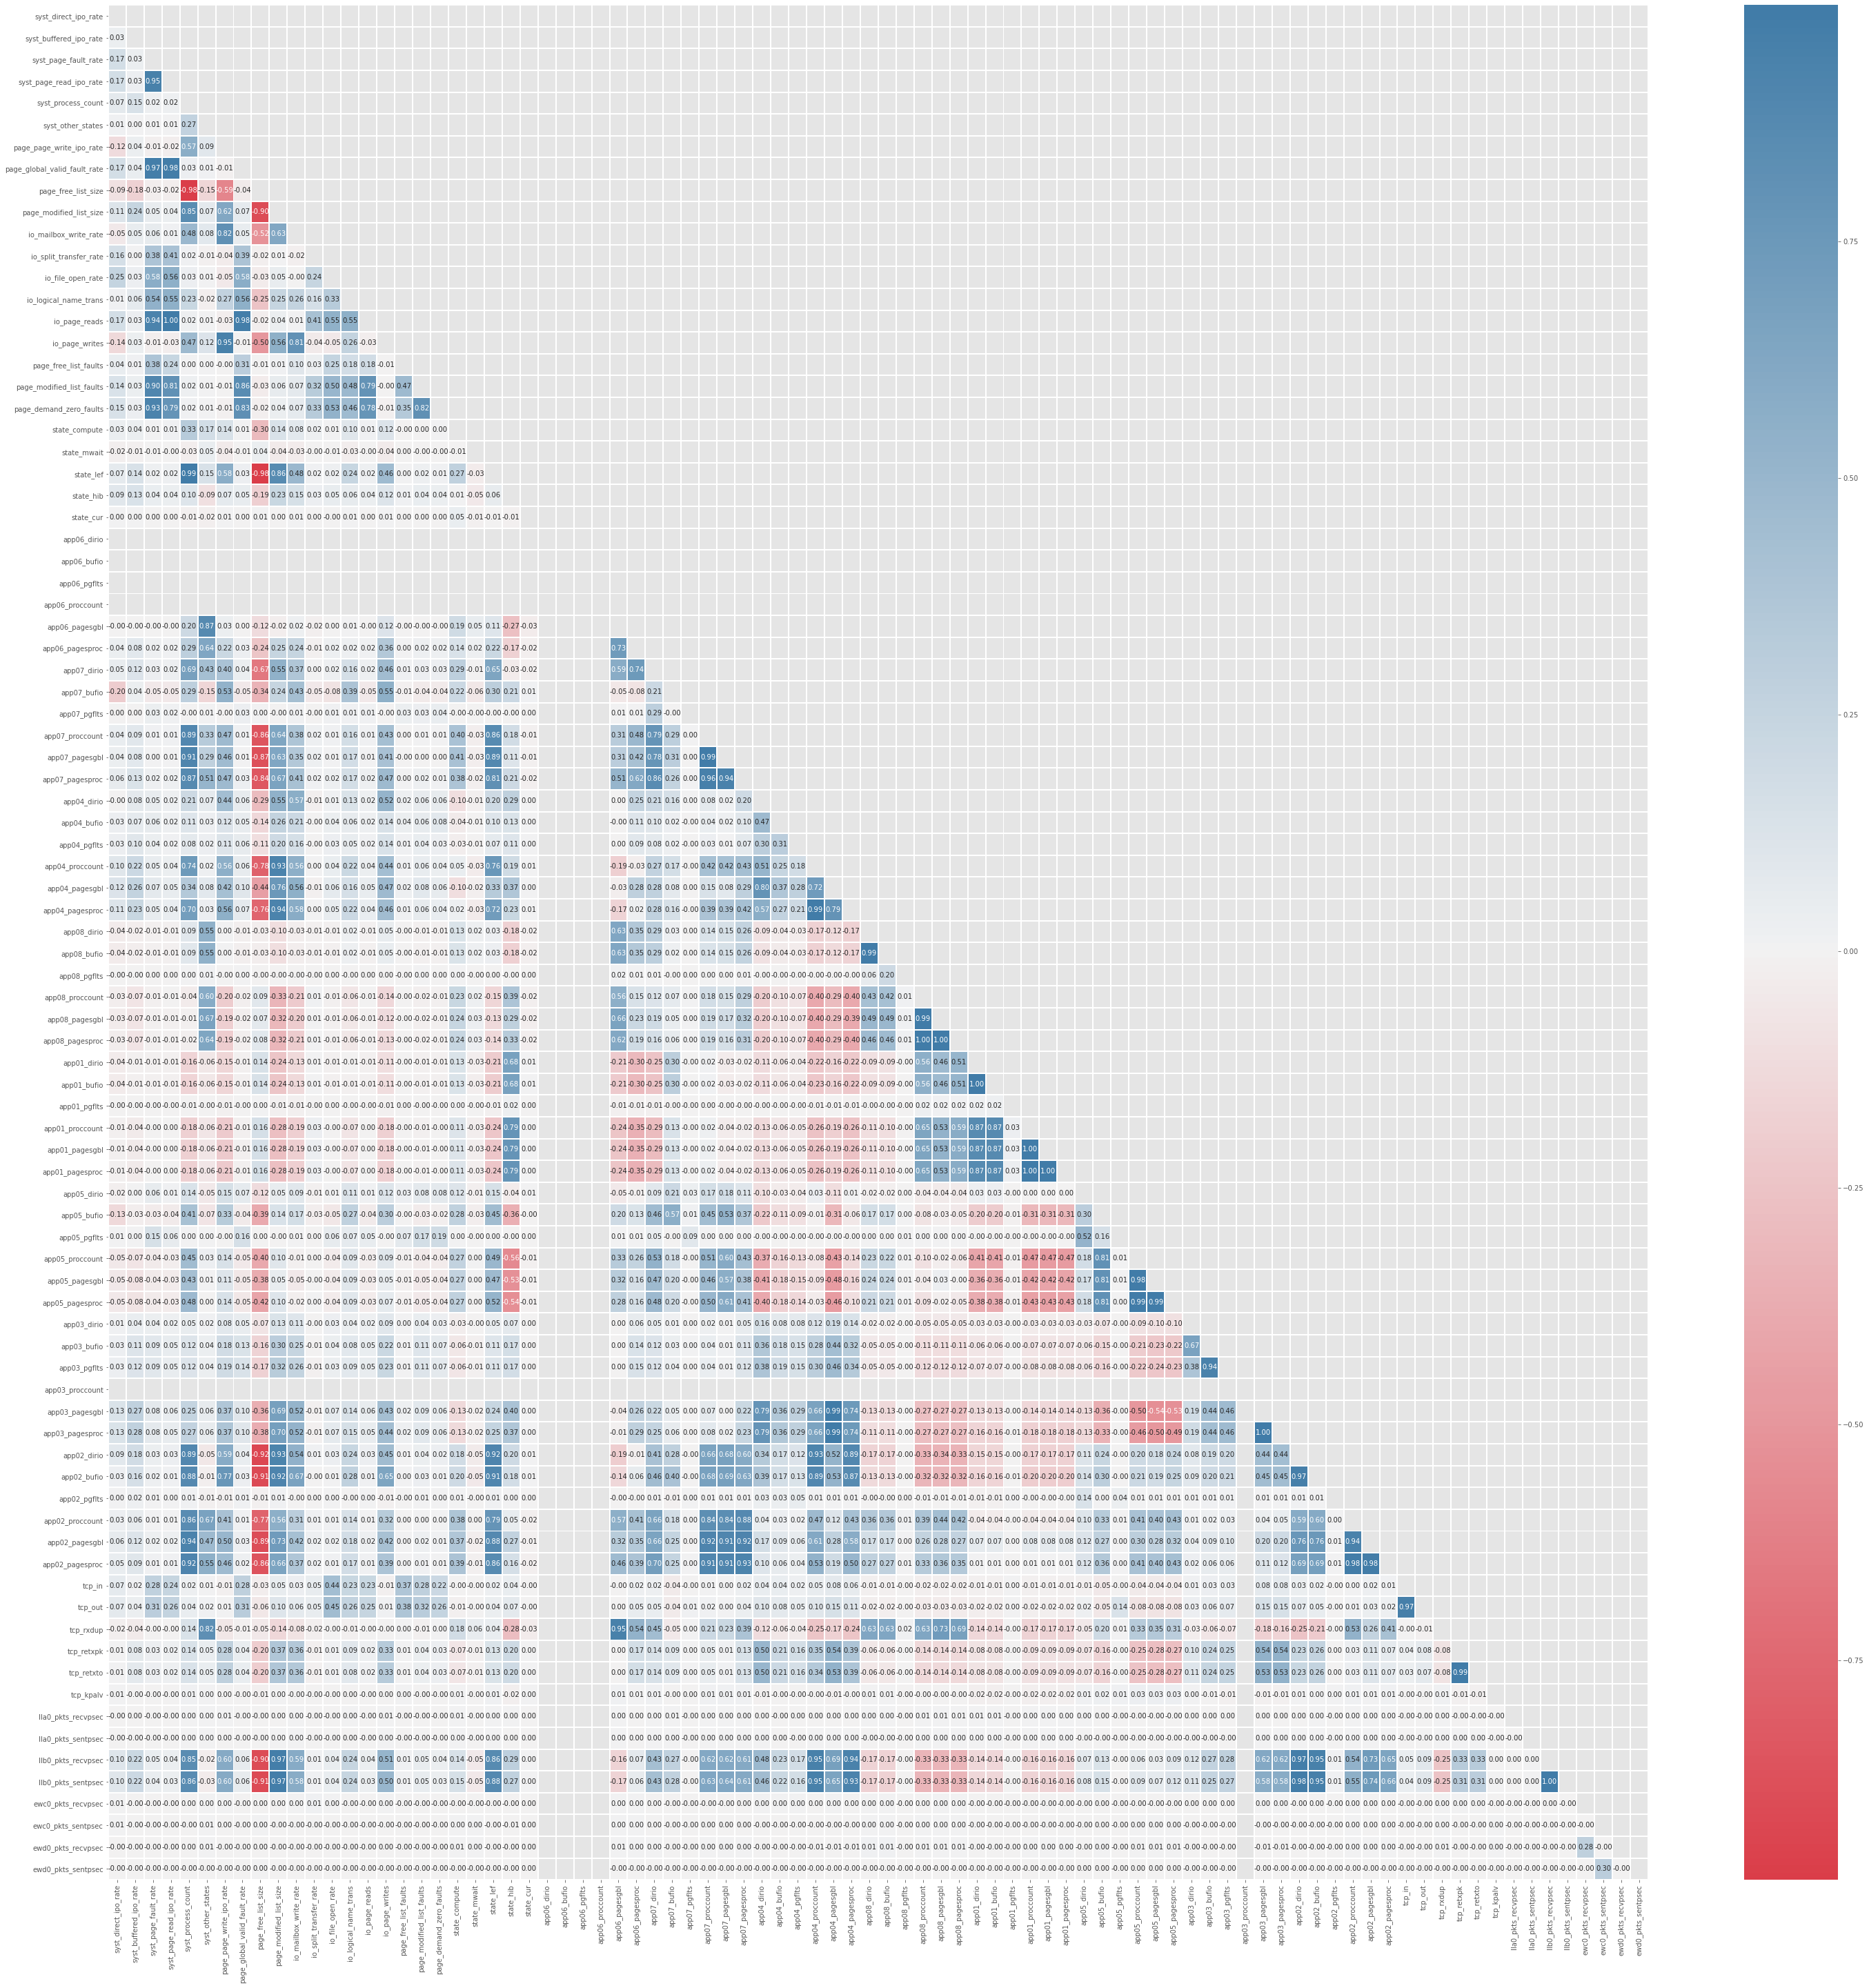

In [ ]:
plt.figure(figsize=(50,50))
cmap=sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
corr=train.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(train.corr(),cmap=cmap,mask=mask,center=0,annot=True,linewidth=1,fmt=".2f")

plt.show()

In [ ]:
train.drop("m_id",axis=1,inplace=True)  # From the TSNE diagra from the Attached notebook ( Scrap1 We coclude that Served ID has no relation with the Load)


** Through the Coeffient Matrix , Certain columns were removed which were having very High Correlation coeffienct but that led to reduction in accuracy hence are therefore ot beig removed**

In [ ]:
test.drop("m_id",axis=1,inplace=True)

In [ ]:
test.drop("id",axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler  # Scaling the Data

In [ ]:
Scaler=StandardScaler() #Instantiating the Standard Scaler
Scaler.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
train_scaled=Scaler.transform(train)

In [ ]:
test_scaled=Scaler.transform(test)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_scaled,y,test_size=0.30,random_state=42,stratify=y) # Splitting the Data

**Model No. 1 : Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(random_state=42,n_estimators=200,max_depth=5, min_samples_leaf=0.003)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.003, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_11_test_prob=gbc.predict_proba(X_test)
log_loss(y_test,y_pred_11_test_prob)                       
print("The log loss for the above model is  " +str(log_loss(y_test,y_pred_11_test_prob)))

The log loss for the above model is  0.20650859838837252


In [ ]:
y_prd=gbc.predict(X_test)
print("The Test accuracy for the  above model is " + str(accuracy_score(y_test,y_prd)))

The Test accuracy for the  above model is 0.9153749826074857


In [ ]:
y_prd_train=gbc.predict(X_train)
print("The training accuracy for the above model is " + str(accuracy_score(y_train,y_prd_train)))

The training accuracy for the above model is 0.9273915584338139


**Model 2 : Random Forest**


In [ ]:
rfc=RandomForestClassifier(n_estimators=600,max_depth=14,criterion="entropy",random_state=42,n_jobs=-1,min_samples_leaf=1)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_2=rfc.predict_proba(X_test)
y_pred_3=rfc.predict(X_test)

In [ ]:
print("The log loss for the above model is  " + str(log_loss(y_test,y_pred_2)))

The log loss for the above model is  0.22907063842203867


In [ ]:
print("The F1 Score for the above model is  " +str(f1_score(y_test,y_pred_3,average="weighted")))

The F1 Score for the above model is  0.9090902693286137


In [ ]:
print("The test accuracy for the above model is  " +str(accuracy_score(y_test,y_pred_3,)))

The test accuracy for the above model is  0.9100320022262418


In [ ]:
y_pred_tr=rfc.predict(X_train)
print("The Training accuracy with the above model is " +str(accuracy_score(y_train,y_pred_tr)))

The Training accuracy with the above model is 0.9418345319450905


**Model 3 Bagging Classifier with Base estimator = Decision Tree**


In [ ]:
m1=DecisionTreeClassifier(max_depth=11,random_state=42,min_samples_leaf=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier


In [ ]:
bc=BaggingClassifier(base_estimator=m1,n_estimators=200,random_state=42)


In [ ]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=11,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

In [ ]:
y_preddd=bc.predict_proba(X_test)

In [ ]:
print("The Log Loss for the above model is " +str(log_loss(y_test,y_preddd)))

The Log Loss for the above model is 0.2208475858800201


In [ ]:
y_t=bc.predict(X_test)
print("The accuracy for the above model is " +str(accuracy_score(y_test,y_t)))

The accuracy for the above model is 0.9123417281202171


In [ ]:
y_tr=bc.predict(X_train)
accuracy_score(y_train,y_tr)

0.9374932913521056

**Model 4 :MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=35,random_state=42,max_iter=800,verbose=1,tol=0.00000001,learning_rate_init=0.001,n_iter_no_change=25,alpha=0.0001,solver="adam")

In [ ]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.47519976
Iteration 2, loss = 0.29436602
Iteration 3, loss = 0.26975509
Iteration 4, loss = 0.25780256
Iteration 5, loss = 0.25240761
Iteration 6, loss = 0.24884085
Iteration 7, loss = 0.24596600
Iteration 8, loss = 0.24409423
Iteration 9, loss = 0.24187023
Iteration 10, loss = 0.24128148
Iteration 11, loss = 0.24041423
Iteration 12, loss = 0.23953632
Iteration 13, loss = 0.23847229
Iteration 14, loss = 0.23753004
Iteration 15, loss = 0.23752307
Iteration 16, loss = 0.23649260
Iteration 17, loss = 0.23562850
Iteration 18, loss = 0.23524508
Iteration 19, loss = 0.23461354
Iteration 20, loss = 0.23419921
Iteration 21, loss = 0.23465200
Iteration 22, loss = 0.23349870
Iteration 23, loss = 0.23276085
Iteration 24, loss = 0.23214748
Iteration 25, loss = 0.23227799
Iteration 26, loss = 0.23189318
Iteration 27, loss = 0.23109632
Iteration 28, loss = 0.23111564
Iteration 29, loss = 0.23028834
Iteration 30, loss = 0.23055578
Iteration 31, loss = 0.23002260
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=35, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=25, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=1e-08, validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
y_pred_6=mlp.predict_proba(X_test)

In [ ]:
print("The log loss for the above model is " + str(log_loss(y_test,y_pred_6)))

The log loss for the above model is 0.22425898368794897


In [ ]:
y_p=mlp.predict(X_test)

In [ ]:
print("The accuracy for the above model is " +str(accuracy_score(y_test,y_p)))

The accuracy for the above model is 0.9103937665228885


In [ ]:
print("The training accuracy for the above model is " +str(accuracy_score(y_train,mlp.predict(X_train))))

The training accuracy for the above model is 0.91702744284232


**Now Initiating a Voting classifier to combine the best 3 models from above**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
classifiers=[("Mlp",mlp),("bagginng",bc),("gradient",gbc)] # Combining MLP, Bagging classifier & Gradient Boosting classifier

In [ ]:
vt=VotingClassifier(estimators=classifiers,voting ='soft')

In [ ]:
vt.fit(X_train,y_train)

Iteration 1, loss = 0.47519976
Iteration 2, loss = 0.29436602
Iteration 3, loss = 0.26975509
Iteration 4, loss = 0.25780256
Iteration 5, loss = 0.25240761
Iteration 6, loss = 0.24884085
Iteration 7, loss = 0.24596600
Iteration 8, loss = 0.24409423
Iteration 9, loss = 0.24187023
Iteration 10, loss = 0.24128148
Iteration 11, loss = 0.24041423
Iteration 12, loss = 0.23953632
Iteration 13, loss = 0.23847229
Iteration 14, loss = 0.23753004
Iteration 15, loss = 0.23752307
Iteration 16, loss = 0.23649260
Iteration 17, loss = 0.23562850
Iteration 18, loss = 0.23524508
Iteration 19, loss = 0.23461354
Iteration 20, loss = 0.23419921
Iteration 21, loss = 0.23465200
Iteration 22, loss = 0.23349870
Iteration 23, loss = 0.23276085
Iteration 24, loss = 0.23214748
Iteration 25, loss = 0.23227799
Iteration 26, loss = 0.23189318
Iteration 27, loss = 0.23109632
Iteration 28, loss = 0.23111564
Iteration 29, loss = 0.23028834
Iteration 30, loss = 0.23055578
Iteration 31, loss = 0.23002260
Iteration 32, los

VotingClassifier(estimators=[('Mlp',
                              MLPClassifier(activation='relu', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1e-08,
                                            hidden_layer_sizes=35,
                                            learning_rate='constant',
                                            learning_rate_init=0.001,
                                            max_fun=15000, max_iter=800,
                                            momentum=0.9, n_iter_no_change=25,
                                            nesterovs_momentum=True,
                                            power_t=0.5, random_state=42,
                                            shuffle=...
                                                         max_leaf_nodes=None,
                                    

In [ ]:
y_final=vt.predict(X_test)
print("The Test accuracy for the Voting classifier is  " +str(accuracy_score(y_test,y_final)))

The Test accuracy for the Voting classifier is  0.9161819952692362


In [ ]:

y_final1=vt.predict(X_train)
print("The Training accuracy for the Voting classifier is " +str(accuracy_score(y_train,y_final1)))

The Training accuracy for the Voting classifier is 0.9298961203143822


In [ ]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

        high       0.88      0.76      0.81      4551
         low       0.95      0.94      0.94     12779
      medium       0.90      0.94      0.92     18605

    accuracy                           0.92     35935
   macro avg       0.91      0.88      0.89     35935
weighted avg       0.92      0.92      0.92     35935



In [ ]:
y_prob=vt.predict_proba(X_test)

In [ ]:
log_loss(y_test,y_prob)

0.20421505489522462

The Log Loss is 0.20421

Now Predicting on the test dataset 

In [ ]:
X_test.shape

(35935, 86)

In [ ]:
test.shape

(58998, 86)

In [ ]:
y_final=pd.DataFrame(vt.predict_proba(test_scaled))

In [ ]:
y_final

,0,1,2
0,0.000141,0.994362,0.005498
1,0.002270,0.019353,0.978377
2,0.000935,0.996102,0.002963
3,0.001240,0.734814,0.263946
4,0.000927,0.996329,0.002744
...,...,...,...
58993,0.002075,0.095005,0.902920
58994,0.045395,0.160443,0.794162
58995,0.002116,0.927649,0.070235
58996,0.006625,0.005275,0.988100


In [ ]:
y_final.to_csv("output1.csv")

**Below models were tried as well but were rejected due to low accuracy**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

In [ ]:
etc=ExtraTreesClassifier(criterion="entropy")
                         

In [ ]:
param_grid={"n_estimators":[180,220,250,300],"max_depth":[14,16,18,20,22]}

In [ ]:
grid3=GridSearchCV(etc,param_grid,n_jobs=-1)

In [ ]:
grid3.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None,
                                            criterion='entropy', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose

In [ ]:
grid3.best_params_

{'max_depth': 22, 'n_estimators': 180}

In [ ]:
grid3.best_score_

0.9019523609829921

In [ ]:

log_loss(y_test,y_pred_etc)

0.27030861276874313

In [ ]:

y_pred_et= etc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_et)

0.9007930986503409

In [ ]:
y_pred_et_train= etc.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred_et_train)

0.9799396519851634

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
classifiers=[("Mlp",mlp),("bagginng",bc),("gradient",gbc)]

In [ ]:
stc=StackingClassifier(estimators=classifiers,final_estimator=GradientBoostingClassifier(),n_jobs=-1)

In [ ]:
accuracy_score()

In [ ]:
bc2=BaggingClassifier(base_estimator=gbc,n_estimators=10,random_state=42)

In [ ]:
bc2.fit(X_train,y_train)

NameError: ignored